In [7]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import normalize

In [4]:
data = fetch_olivetti_faces()
X = data.images
y = data.target

In [5]:
X.shape

(400, 64, 64)

In [8]:

def histo_lbp(image_name, parameters_of_lbp, n_bins_of_histogram):
    # Extract LBP texture features
    lbp_image = local_binary_pattern(image_name, **parameters_of_lbp)
    
    # Compute histogram of LBP features
    hist, _ = np.histogram(lbp_image.ravel(), bins=n_bins_of_histogram, range=(0, n_bins_of_histogram))
    
    # Normalize histogram
    hist = normalize(hist.reshape(1, -1))
    
    return hist

In [ ]:
def feature_extraction(X, n_bins_histograms, params_lbp):
    # Initialize matrix H to store LBP histograms and class labels
    num_images = len(X)
    H = np.zeros((num_images, n_bins_histograms + 1))  # +1 for class labels
    
    # Compute LBP histograms for each face image
    for i, image in enumerate(X):
        # Compute histogram of LBP features for each image
        histogram = histo_lbp(image, params_lbp, n_bins_histograms)
        
        # Store LBP histogram in H
        H[i, :-1] = histogram  # Store histogram values
        H[i, -1] = i // 4  # Assign class label (assuming 4 images per class)
    
    return H

In [ ]:
def histo_distance(P, Q):
    # Compute Bhattacharyya coefficient
    bc = np.sum(np.sqrt(P * Q))
    
    # Compute similarity measure using Bhattacharyya metric
    sim = np.sqrt(1 - bc)
    
    return sim

In [ ]:
# Step 1: Randomly select a query image from the dataset X
def select_query_image(X, y):
    idx = np.random.randint(0, len(X))
    query_image = X[idx]
    query_label = y[idx]
    return query_image, query_label

# Step 2: Display the query image with its class label
def display_query_image(query_image, query_label):
    plt.imshow(query_image, cmap='gray')
    plt.title(f"Query Image - Class {query_label}")
    plt.axis('off')
    plt.show()

# Step 3: Implement the image retrieval function
def image_retrieval(query_image, dataset_images, dataset_labels, n_retrievals=5):
    # Extract features of query image
    query_features = histo_lbp(query_image, params_lbp, n_bins_histograms)
    
    # Compute distances between query image and dataset images
    distances = []
    for img in dataset_images:
        features = histo_lbp(img, params_lbp, n_bins_histograms)
        distance = histo_distance(query_features, features)
        distances.append(distance)
    
    # Convert distances to numpy array
    distances = np.array(distances)
    
    # Exclude the query image from target images
    idx_sorted = np.argsort(distances)[1:]  # Exclude first index (query image)
    
    # Display the most similar images to the query image
    for i in range(n_retrievals):
        plt.subplot(1, n_retrievals, i+1)
        plt.imshow(dataset_images[idx_sorted[i]], cmap='gray')
        plt.title(f"Similarity: {distances[idx_sorted[i]]:.2f}")
        plt.axis('off')
    plt.show()

# Main function
def main():
    # Load dataset
    data = fetch_olivetti_faces()
    X = data.images
    y = data.target
    
    # Select query image
    query_image, query_label = select_query_image(X, y)
    
    # Display query image
    display_query_image(query_image, query_label)
    
    # Perform image retrieval
    image_retrieval(query_image, X, y)

if __name__ == "__main__":
    main()

In [ ]:
def image_retrieval(query_image, query_label, dataset_images, dataset_labels, n_retrievals=5):
    # Extract features of query image
    query_features = histo_lbp(query_image, params_lbp, n_bins_histograms)
    
    # Compute distances between query image and dataset images
    distances = []
    for img in dataset_images:
        features = histo_lbp(img, params_lbp, n_bins_histograms)
        distance = histo_distance(query_features, features)
        distances.append(distance)
    
    # Convert distances to numpy array
    distances = np.array(distances)
    
    # Exclude the query image from target images
    idx_sorted = np.argsort(distances)[1:]  # Exclude first index (query image)
    
    # Count correct retrievals
    correct_retrievals = 0
    for i in range(n_retrievals):
        if dataset_labels[idx_sorted[i]] == query_label:
            correct_retrievals += 1
    
    # Compute performance
    performance = correct_retrievals / n_retrievals
    
    # Display the most similar images to the query image
    for i in range(n_retrievals):
        plt.subplot(1, n_retrievals, i+1)
        plt.imshow(dataset_images[idx_sorted[i]], cmap='gray')
        plt.title(f"Similarity: {distances[idx_sorted[i]]:.2f}")
        plt.axis('off')
    plt.show()
    
    return performance

# Main function
def main():
    # Load dataset
    data = fetch_olivetti_faces()
    X = data.images
    y = data.target
    
    # Select query image
    query_idx = np.random.randint(0, len(X))
    query_image = X[query_idx]
    query_label = y[query_idx]
    
    # Perform image retrieval and compute performance
    performance = image_retrieval(query_image, query_label, X, y)
    
    # Print performance
    print("Performance:", performance * 100, "%")


In [ ]:
# LBP parameters
parameters_of_lbp = {'P': 8, 'R': 1, 'method': 'uniform'}
n_bins_of_histogram = 256

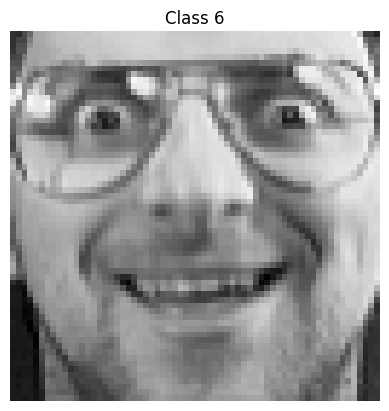

c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
C:\Users\Hammad\AppData\Local\Temp\ipykernel_21672\236999732.py:44: RuntimeWarning: invalid value encountered in sqrt
  sim = np.sqrt(1 - bc)
c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_patte

query_label: 0


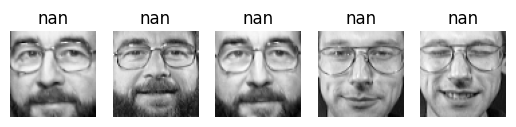

Original Performance: 0.0 %


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import normalize
from skimage.util import random_noise


def histo_lbp(image_name, parameters_of_lbp, n_bins_of_histogram):
    # Extract LBP texture features
    lbp_image = local_binary_pattern(image_name, **parameters_of_lbp)
    
    # Compute histogram of LBP features
    hist, _ = np.histogram(lbp_image.ravel(), bins=n_bins_of_histogram, range=(0, n_bins_of_histogram))
    
    # Normalize histogram
    hist = normalize(hist.reshape(1, -1))
    
    return hist


def feature_extraction(X, n_bins_histograms, params_lbp):
    # Initialize matrix H to store LBP histograms and class labels
    num_images = len(X)
    H = np.zeros((num_images, n_bins_histograms + 1))  # +1 for class labels
    
    # Compute LBP histograms for each face image
    for i, image in enumerate(X):
        # Compute histogram of LBP features for each image
        histogram = histo_lbp(image, params_lbp, n_bins_histograms)
        
        # Store LBP histogram in H
        H[i, :-1] = histogram  # Store histogram values
        H[i, -1] = i // 4  # Assign class label (assuming 4 images per class)
    
    return H


def histo_distance(P, Q):
    # Compute Bhattacharyya coefficient
    bc = np.sum(np.sqrt(P * Q))
    
    # Compute similarity measure using Bhattacharyya metric
    sim = np.sqrt(1 - bc)
    
    return sim


# LBP parameters
params_lbp = {'P': 8, 'R': 1, 'method': 'uniform'}
n_bins_histograms = 256


# Image retrieval
def image_retrieval(query_image, dataset_X):
    global y
    
    # Extract features of query image
    query_features = histo_lbp(query_image, params_lbp, n_bins_histograms)
    
    # Compute distances between query image and dataset images
    distances = []
    for img in dataset_X:
        features = histo_lbp(img, params_lbp, n_bins_histograms)
        distance = histo_distance(query_features, features)
        distances.append(distance)
    
    # Convert distances to numpy array
    distances = np.array(distances)
    
    # Exclude the query image from target images
    idx_sorted = np.argsort(distances)
    
    # Extract query label
    query_idx = np.argmin(distances)
    query_label = y[query_idx]

    print("query_label: " + str(query_label))
    
    # Count correct retrievals
    correct_retrievals = 0
    for i in range(1, 6):  # Exclude first index (query image)
        if y[idx_sorted[i]] == query_label:
            correct_retrievals += 1
    
    # Compute performance
    performance = correct_retrievals / 5
    
    # Display the most similar images to the query image
    for i in range(1, 6):  # Exclude first index (query image)
        plt.subplot(1, 5, i)
        plt.imshow(dataset_X[idx_sorted[i]], cmap='gray')
        plt.title(f"{distances[idx_sorted[i]]:.2f}")
        plt.axis('off')
    plt.show()
    
    return performance




# Main function
def main():
    # Load dataset
    data = fetch_olivetti_faces()
    X = data.images
    y = data.target
    
    # Select query image
    idx = np.random.randint(0, len(X))
    query_image = X[idx]
    query_label = y[idx]
    
    # Display query image
    plt.imshow(query_image, cmap='gray')
    plt.title(f"Class {query_label}")
    plt.axis('off')
    plt.show()

    # # Step 5: Perform image retrieval
    performance_original = image_retrieval(query_image, X)
    print("Original Performance:", performance_original * 100, "%")
    
    # # Step 2: Standard deviations for Gaussian noise
    # std_values = [0.05, 0.1, 0.3]
    
    # for std in std_values:
    #     # Step 1: Add Gaussian noise to dataset images
    #     noisy_X = add_noise_to_images(X, std)
        
    #     # Display noisy query image
    #     plt.imshow(noisy_X[query_idx], cmap='gray')
    #     plt.title(f"Noisy Query Image (std={std}) - Class {query_label}")
    #     plt.axis('off')
    #     plt.show()
        
    #     # Perform image retrieval with noisy dataset images
    #     performance_noise = image_retrieval_with_noise(query_image, query_label, noisy_X, y, std)
    #     print(f"Noisy Image Retrieval Performance (std={std}):", performance_noise * 100, "%")

if __name__ == "__main__":
    main()


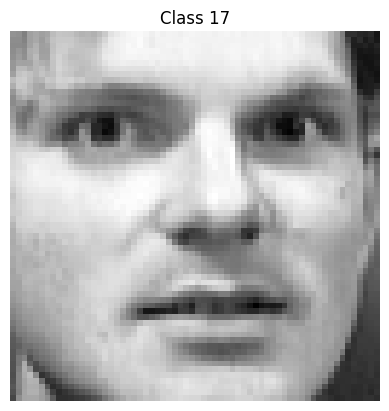

c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommend

ValueError: operands could not be broadcast together with shapes (1,256) (257,) 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import normalize

# LBP parameters
params_lbp = {'P': 8, 'R': 1, 'method': 'uniform'}
n_bins_histograms = 256

# Function to compute LBP histogram
def histo_lbp(image, parameters, n_bins):
    # Extract LBP texture features
    lbp_image = local_binary_pattern(image, **parameters)
    
    # Compute histogram of LBP features
    hist, _ = np.histogram(lbp_image.ravel(), bins=n_bins, range=(0, n_bins))
    
    # Normalize histogram
    hist = normalize(hist.reshape(1, -1))
    
    return hist

# Function to compute histogram distance
def histo_distance(P, Q):
    # Compute Bhattacharyya coefficient
    bc = np.sum(np.sqrt(P * Q))
    
    # Compute similarity measure using Bhattacharyya metric
    sim = np.sqrt(1 - bc)
    
    return sim

# Function for feature extraction
def feature_extraction(X, n_bins_histograms, params_lbp):
    # Initialize matrix H to store LBP histograms and class labels
    num_images = len(X)
    H = np.zeros((num_images, n_bins_histograms + 1))  # +1 for class labels
    
    # Compute LBP histograms for each face image
    for i, image in enumerate(X):
        # Compute histogram of LBP features for each image
        histogram = histo_lbp(image, params_lbp, n_bins_histograms)
        
        # Store LBP histogram in H
        H[i, :-1] = histogram  # Store histogram values
        H[i, -1] = i // 4  # Assign class label (assuming 4 images per class)
    
    return H

# Image retrieval
def image_retrieval(query_image, dataset_features):
    global y
    
    # Extract features of query image
    query_features = histo_lbp(query_image, params_lbp, n_bins_histograms)
    
    # Compute distances between query image and dataset images
    distances = []
    for features in dataset_features:
        distance = histo_distance(query_features, features)
        distances.append(distance)
    
    # Convert distances to numpy array
    distances = np.array(distances)
    
    # Exclude the query image from target images
    idx_sorted = np.argsort(distances)
    
    # Extract query label
    query_idx = np.argmin(distances)
    query_label = y[query_idx]

    print("query_label:", query_label)
    
    # Count correct retrievals
    correct_retrievals = 0
    for i in range(1, 6):  # Exclude first index (query image)
        if y[idx_sorted[i]] == query_label:
            correct_retrievals += 1
    
    # Compute performance
    performance = correct_retrievals / 5
    
    # Display the most similar images to the query image
    for i in range(1, 6):  # Exclude first index (query image)
        plt.subplot(1, 5, i)
        plt.imshow(X[idx_sorted[i]], cmap='gray')
        plt.title(f"{distances[idx_sorted[i]]:.2f}")
        plt.axis('off')
    plt.show()
    
    return performance

# Main function
def main():
    global y
    
    # Load dataset
    data = fetch_olivetti_faces()
    X = data.images
    y = data.target
    
    # Select query image
    idx = np.random.randint(0, len(X))
    query_image = X[idx]
    query_label = y[idx]
    
    # Display query image
    plt.imshow(query_image, cmap='gray')
    plt.title(f"Class {query_label}")
    plt.axis('off')
    plt.show()
    
    # Extract features of all images in the dataset
    dataset_features = feature_extraction(X, n_bins_histograms, params_lbp)

    # Perform image retrieval
    performance_original = image_retrieval(query_image, dataset_features)
    print("Original Performance:", performance_original * 100, "%")

if __name__ == "__main__":
    main()


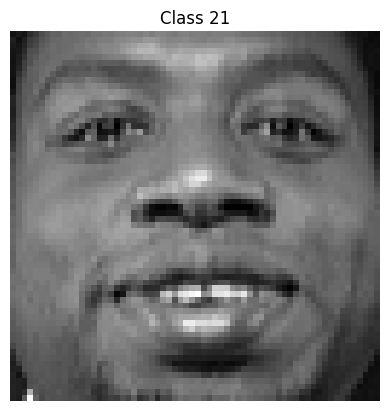

C:\Users\Hammad\AppData\Local\Temp\ipykernel_21672\1860257986.py:47: RuntimeWarning: divide by zero encountered in divide
  t = P/Q
C:\Users\Hammad\AppData\Local\Temp\ipykernel_21672\1860257986.py:49: RuntimeWarning: invalid value encountered in multiply
  distance = abs(np.sum(Q*(dis)))


Dis [651.94336, 479.6767, 607.7772, 360.2082, 563.7895, 492.60812, 681.32776, 550.56934, 708.2514, 458.35782, 443.90216, 482.43195, 426.7836, 403.7906, 477.2921, 441.54938, 311.1999, 366.40347, 394.15308, 380.7458, 295.52512, 312.07605, 328.04544, 267.0396, 270.1082, 366.7875, 463.79056, 400.50598, 523.5626, 527.6417, 402.2386, 378.40668, 359.63232, 592.03174, 562.07477, 490.1723, 604.74426, 402.71906, 353.83032, 550.249, 461.5415, 400.09927, 368.15866, 456.1963, 528.0017, 508.4768, 474.2476, 476.6588, 550.2311, 647.76715, 669.9474, 667.47394, 694.91797, 851.11804, 839.12634, 887.021, 830.1489, 876.4951, 793.32324, 857.36145, 629.582, 492.497, 618.2221, 510.99536, 617.3706, 618.97974, 694.75854, 679.16077, 643.3907, 563.0809, 582.0981, 465.65598, 635.04553, 274.66614, 680.07135, 735.1467, 405.7763, 642.7519, 516.0514, 467.58337, 266.44504, 255.80554, 225.03091, 437.70612, 443.7655, 399.43008, 442.04514, 477.54388, 420.09955, 440.50928, 361.60556, 308.16248, 165.94373, 160.7314, 465.286

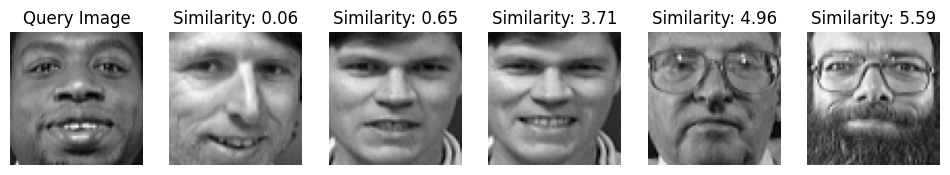

Query Histogram: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Dataset Image 1 Histogram: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import normalize

# LBP parameters
params_lbp = {'P': 8, 'R': 1, 'method': 'uniform'}
n_bins_histograms = 256

# Function to compute LBP histogram
def histo_lbp(image_name, parameters_of_lbp, n_bins_of_histogram):
    # Convert image to integer dtype
    image_name = image_name.astype(np.uint8)
    
    # Extract LBP texture features
    lbp_image = local_binary_pattern(image_name, **parameters_of_lbp)
    
    # Compute histogram of LBP features
    hist, _ = np.histogram(lbp_image.ravel(), bins=n_bins_of_histogram, range=(0, n_bins_of_histogram))
    
    # Normalize histogram
    hist = normalize(hist.reshape(1, -1))
    
    return hist

# Function to compute histogram distance
# def histo_distance(P, Q):
#     # Compute Bhattacharyya coefficient
#     bc = np.sum(np.sqrt(P * Q))
    
#     # Compute similarity measure using Bhattacharyya metric
#     sim = np.sqrt(1 - bc)
    
#     return sim

def histo_distance(P, Q):
    # Compute Bhattacharyya coefficient
    # bc = np.sum(np.sqrt(P * Q))
    
    # # Cap bc at 1 to avoid sqrt of negative value
    # bc = min(bc, 1.0)
    
    # # Compute Bhattacharyya distance
    # distance = -np.log(bc)
    try:
        t = P/Q
        dis = t*np.log(t)
        distance = abs(np.sum(Q*(dis)))
        return distance
    except:
        return np.sum(np.sqrt(P * Q)) 


# Function for feature extraction
def feature_extraction(X, n_bins_histograms, params_lbp):
    # Initialize matrix H to store LBP histograms and class labels
    num_images = len(X)
    H = np.zeros((num_images, n_bins_histograms))  # Matrix for histograms
    
    # Compute LBP histograms for each face image
    for i, image in enumerate(X):
        # Compute histogram of LBP features for each image
        histogram = histo_lbp(image, params_lbp, n_bins_histograms)
        
        # Store LBP histogram in H
        H[i] = histogram
    
    return H

# Function for image retrieval
# def image_retrieval(query_image, dataset_X):
#     global y
    
#     # Compute histogram of the query image
#     query_histogram = histo_lbp(query_image, params_lbp, n_bins_histograms)
    
#     # Compute distances between query image and dataset images
#     distances = []
#     for hist in dataset_X:
#         distance = histo_distance(query_histogram, hist)
#         distances.append(distance)
    
#     # Convert distances to numpy array
#     distances = np.array(distances)
    
#     # Sort indices based on distance
#     sorted_indices = np.argsort(distances)
    
#     # Extract query label
#     query_idx = np.argmin(distances)
#     query_label = y[query_idx]

#     # Count correct retrievals
#     correct_retrievals = 0
#     for i in range(1, 6):  # Exclude first index (query image)
#         if y[sorted_indices[i]] == query_label:
#             correct_retrievals += 1
    
#     # Compute performance
#     performance = correct_retrievals / 5
    
#     # Display the most similar images to the query image
#     fig, axes = plt.subplots(1, 6, figsize=(12, 6))
#     axes[0].imshow(query_image, cmap='gray')
#     axes[0].set_title('Query Image')
#     axes[0].axis('off')
    
#     for i, idx in enumerate(sorted_indices[1:6], 1):  # Exclude first index (query image)
#         axes[i].imshow(fetch_olivetti_faces().images[idx], cmap='gray')
#         axes[i].set_title(f"Similarity: {distances[idx]:.2f}")
#         axes[i].axis('off')
    
#     plt.show()
    
#     return performance

def image_retrieval(query_image, dataset_X):
    global y
    
    # Compute histogram of the query image
    query_histogram = histo_lbp(query_image, params_lbp, n_bins_histograms)
    
    # Compute distances between query image and dataset images
    distances = []
    for hist in dataset_X:
        distance = histo_distance(query_image, hist)
        distances.append(distance)

    print("Dis", distances)    
    # Convert distances to numpy array
    # distances = np.array(distances)
    
    # Sort indices based on distance
    sorted_indices = np.argsort(distances)
    print("Sor", sorted_indices)

    sorted_distances = sorted(distances)
    print("Sor", sorted_distances)
    
    # Extract query label
    query_idx = np.argmin(distances)
    query_label = y[query_idx]

    # print("Bhattacharyya Coefficient for Query Image:", distances[query_idx])

    # Count correct retrievals
    correct_retrievals = 0
    for i in range(1, 6):  # Exclude first index (query image)
        if y[sorted_indices[i]] == query_label:
            correct_retrievals += 1
    
    # Compute performance
    performance = correct_retrievals / 5
    
    # Display the most similar images to the query image
    fig, axes = plt.subplots(1, 6, figsize=(12, 6))
    axes[0].imshow(query_image, cmap='gray')
    axes[0].set_title('Query Image')
    axes[0].axis('off')
    
    for i, idx in enumerate(sorted_indices[1:6], 1):  # Exclude first index (query image)
        axes[i].imshow(fetch_olivetti_faces().images[idx], cmap='gray')
        axes[i].set_title(f"Similarity: {distances[idx]:.2f}")
        axes[i].axis('off')
    
    plt.show()

    print("Query Histogram:", query_histogram)

    for i in range(5):  # Print histograms for the first 5 images in the dataset
        dataset_image = fetch_olivetti_faces().images[i]
        dataset_histogram = histo_lbp(dataset_image, params_lbp, n_bins_histograms)
        print(f"Dataset Image {i+1} Histogram:", dataset_histogram)

    # Print labels for the first 5 images in the dataset
    print("Labels for the first 5 images in the dataset:", y[:5])

    
    return performance


# Main function
def main():
    global y
    
    # Load dataset
    data = fetch_olivetti_faces()
    X = data.images
    y = data.target
    
    # Select query image
    idx = np.random.randint(0, len(X))
    query_image = X[idx]
    
    # Display query image
    plt.imshow(query_image, cmap='gray')
    plt.title(f"Class {y[idx]}")
    plt.axis('off')
    plt.show()
    
    # Perform feature extraction
    dataset_features = feature_extraction(X, n_bins_histograms, params_lbp)
    
    # Perform image retrieval
    performance = image_retrieval(query_image, X)
    print("Performance:", performance * 100, "%")

if __name__ == "__main__":
    main()

NameError: name 'query_histogram' is not defined

In [76]:
!pip install scipy --upgrade

     ---------------------------------------- 46.2/46.2 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.0
    Uninstalling scipy-1.10.0:
      Successfully uninstalled scipy-1.10.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Hammad\\Documents\\Python_Envs\\bert_trans_env\\Lib\\site-packages\\~cipy.libs\\libopenblas-802f9ed1179cb9c9b03d67ff79f48187.dll'
Check the permissions.


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import numpy as np
from scipy.spatial import distance


data = fetch_olivetti_faces()
X = data.images
y = data.target

def histo_distance(P, Q):
    # # Compute Bhattacharyya coefficient
    # bc = np.sum(np.sqrt(P * Q))
    
    # # Cap bc at 1 to avoid sqrt of negative value
    # bc = min(bc, 1.0)
    
    # # Compute Bhattacharyya distance
    # distance = -np.log(bc)
    
    # return distance




    # Bhattacharyya distance
    db = -np.log(distance.bhattacharyya(P, Q))
    return db

from scipy.stats import multivariate_normal 

def bhattacharya_dist(mu1, cov1, mu2, cov2): 
    # Create two multivariate normal distributions with the given means and covariances 
    dist1 = multivariate_normal(mean=mu1, cov=cov1) 
    dist2 = multivariate_normal(mean=mu2, cov=cov2) 
    # Calculate the Bhattacharya distance between the two distributions 
    bc_dist = np.sqrt(dist1.pdf((mu1 + mu2) / 2) * dist2.pdf((mu1 + mu2) / 2) / np.sqrt(dist1.pdf(mu1) * dist2.pdf(mu2))) 
    return bc_dist


input_image = X[10]
distances = []

for i in X:
    distances.append(histo_distance(input_image, i))

print(distances)

AttributeError: module 'scipy.spatial.distance' has no attribute 'bhattacharyya'

In [82]:
from scipy.spatial.distance import 
.distance.bhattacharyya
-np.log(distance.bhattacharyya(input_image, X[11]))

ModuleNotFoundError: No module named 'scipy.spatial.distance.bhattacharyya'; 'scipy.spatial.distance' is not a package

In [42]:
import numpy as np
from math import sqrt
from scipy.stats import gaussian_kde

def get_density(x, cov_factor=0.1):
    #Produces a continuous density function for the data in 'x'. Some benefit may be gained from adjusting the cov_factor.
    density = gaussian_kde(x)
    density.covariance_factor = lambda:cov_factor
    density._compute_covariance()
    return density

def bhatta_dist(X1, X2, method='continuous'):
    #Calculate the Bhattacharyya distance between X1 and X2. X1 and X2 should be 1D numpy arrays representing the same
    # feature in two separate classes. 

    #Combine X1 and X2, we'll use it later:
    cX = np.concatenate((X1,X2))

    if method == 'noiseless':
        ###This method works well when the feature is qualitative (rather than quantitative). Each unique value is
        ### treated as an individual bin.
        uX = np.unique(cX)
        A1 = len(X1) * (max(cX)-min(cX)) / len(uX)
        A2 = len(X2) * (max(cX)-min(cX)) / len(uX)
        bht = 0
        for x in uX:
            p1 = (X1==x).sum() / A1
            p2 = (X2==x).sum() / A2
            bht += sqrt(p1*p2) * (max(cX)-min(cX))/len(uX)

    elif method == 'hist':
        ###Bin the values into a hardcoded number of bins (This is sensitive to N_BINS)
        N_BINS = 10
        #Bin the values:
        h1 = np.histogram(X1,bins=N_BINS,range=(min(cX),max(cX)), density=True)[0]
        h2 = np.histogram(X2,bins=N_BINS,range=(min(cX),max(cX)), density=True)[0]
        #Calc coeff from bin densities:
        bht = 0
        for i in range(N_BINS):
            p1 = h1[i]
            p2 = h2[i]
            bht += sqrt(p1*p2) * (max(cX)-min(cX))/N_BINS

    elif method == 'autohist':
        ###Bin the values into bins automatically set by np.histogram:
        #Create bins from the combined sets:
        # bins = np.histogram(cX, bins='fd')[1]
        bins = np.histogram(cX, bins='doane')[1] #Seems to work best
        # bins = np.histogram(cX, bins='auto')[1]

        h1 = np.histogram(X1,bins=bins, density=True)[0]
        h2 = np.histogram(X2,bins=bins, density=True)[0]

        #Calc coeff from bin densities:
        bht = 0
        for i in range(len(h1)):
            p1 = h1[i]
            p2 = h2[i]
            bht += sqrt(p1*p2) * (max(cX)-min(cX))/len(h1)

    elif method == 'continuous':
        ###Use a continuous density function to calculate the coefficient (This is the most consistent, but also slightly slow):
        N_STEPS = 200
        #Get density functions:
        d1 = get_density(X1)
        d2 = get_density(X2)
        #Calc coeff:
        xs = np.linspace(min(cX),max(cX),N_STEPS)
        bht = 0
        for x in xs:
            p1 = d1(x)
            p2 = d2(x)
            bht += sqrt(p1*p2)*(max(cX)-min(cX))/N_STEPS

    else:
        raise ValueError("The value of the 'method' parameter does not match any known method")

    ###Lastly, convert the coefficient into distance:
    if bht==0:
        return float('Inf')
    else:
        return -np.log(bht)

In [84]:
data = fetch_olivetti_faces()
X = data.images
y = data.target

input_image = X[10]
distances = []

def f(t):
    return t*np.log(t)
    
for i in X:
    distances.append(abs(np.sum(i*f(input_image/i))))

print(distances)


[197.38918, 115.45801, 109.78948, 214.72226, 19.965431, 3.6977844, 236.52472, 27.65831, 243.07178, 136.99554, 0.0, 25.69474, 97.07804, 130.9707, 23.886366, 79.88624, 220.94391, 135.9594, 131.61217, 105.126595, 362.75293, 332.1075, 310.04828, 373.2796, 372.92532, 239.8339, 119.0286, 201.37439, 23.689697, 33.047897, 154.85727, 204.87729, 218.35898, 91.18504, 37.888252, 35.049194, 111.72186, 149.88434, 220.79555, 8.829407, 109.76868, 197.17332, 265.61316, 114.64112, 4.5672913, 32.750793, 68.63327, 79.37447, 37.020325, 152.51016, 194.78275, 188.4379, 226.7094, 456.3534, 435.7685, 513.06476, 429.90186, 492.19208, 377.4026, 460.5586, 132.8285, 50.55774, 118.93323, 26.739075, 118.33118, 143.94371, 207.00067, 212.1401, 154.03079, 76.06695, 64.32712, 111.95824, 141.4532, 429.41043, 210.74042, 302.81293, 226.61542, 160.25623, 0.48544312, 146.62085, 407.48816, 436.77856, 477.31696, 156.7098, 157.47853, 209.93471, 140.5544, 96.79697, 184.82904, 166.27158, 227.19688, 328.90222, 588.24365, 592.08026

C:\Users\Hammad\AppData\Local\Temp\ipykernel_21672\1234652990.py:12: RuntimeWarning: divide by zero encountered in divide
  distances.append(abs(np.sum(i*f(input_image/i))))
C:\Users\Hammad\AppData\Local\Temp\ipykernel_21672\1234652990.py:12: RuntimeWarning: invalid value encountered in multiply
  distances.append(abs(np.sum(i*f(input_image/i))))


In [74]:
import scipy.stats

def f(t):
    return t*np.log(t)
    
#方法一：根据公式求解
f1=abs(np.sum(X[11]*f(input_image/ X[11])))
print(f1)

#方法二：调用scipy包求解
f2=scipy.stats.entropy(input_image, X[11]) 

25.69474


In [61]:
a = input_image/ X[111]
a

array([[1.048     , 0.97931033, 0.99358976, ..., 1.5529412 , 2.        ,
        1.9014086 ],
       [1.063492  , 1.0347222 , 1.        , ..., 1.7375001 , 2.0142858 ,
        1.9444443 ],
       [1.0526315 , 1.1048952 , 1.0789473 , ..., 1.5681818 , 2.6545453 ,
        1.9594594 ],
       ...,
       [1.4090909 , 1.2222223 , 1.736842  , ..., 1.1578947 , 1.037037  ,
        2.6       ],
       [1.3913044 , 1.1785715 , 1.28      , ..., 1.15      , 1.173913  ,
        2.6       ],
       [1.4347827 , 1.1851852 , 1.375     , ..., 0.91999996, 1.4210526 ,
        2.0769231 ]], dtype=float32)

In [63]:
b = a*np.log(a)
b

array([[ 0.04913398, -0.02047414, -0.00638965, ...,  0.6835281 ,
         1.3862944 ,  1.2218355 ],
       [ 0.0654662 ,  0.03531817,  0.        , ...,  0.95987725,
         1.4105332 ,  1.2930093 ],
       [ 0.05399286,  0.11021388,  0.08198473, ...,  0.7055514 ,
         2.5915618 ,  1.318067  ],
       ...,
       [ 0.48324028,  0.2452643 ,  0.9588558 , ...,  0.16975138,
         0.03771457,  2.4843295 ],
       [ 0.45946673,  0.19364291,  0.31598085, ...,  0.16072619,
         0.18822826,  2.4843295 ],
       [ 0.5179759 ,  0.20136182,  0.43787387, ..., -0.07671113,
         0.4993548 ,  1.5179973 ]], dtype=float32)

In [66]:
np.sum(X[11]*b)

2017.0114

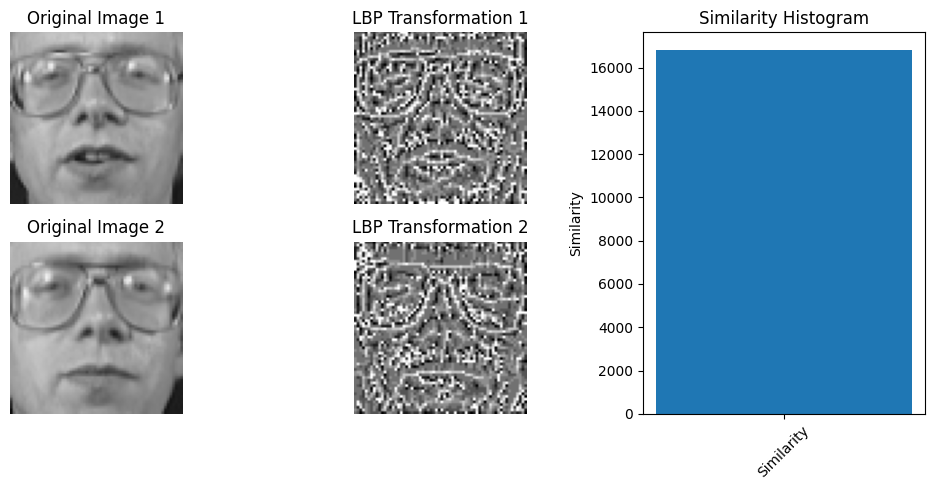

In [100]:
import numpy as np
import cv2
from skimage import feature
import matplotlib.pyplot as plt

def lbp_feature_extraction(image):
    # Convert image to grayscale if not already
    if len(image.shape) > 2:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image
    
    # Compute LBP transformation
    lbp_image = feature.local_binary_pattern(gray_image, 8, 1, method='uniform')
    
    # Compute histogram of LBP transformation
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, 10), range=(0, 10))
    
    return lbp_image, hist

def compute_similarity(hist1, hist2):
    # Compute Bhattacharyya coefficient
    bc = np.sum(np.sqrt(hist1 * hist2))
    
    return bc

# Load two example images
image1 = input_image
image2 = X[11]

# Perform LBP feature extraction for the first image
lbp_image1, _ = lbp_feature_extraction(image1)

# Perform LBP feature extraction for the second image
lbp_image2, _ = lbp_feature_extraction(image2)

# Compute histogram representing similarity between LBP transformations
similarity = compute_similarity(lbp_image1.ravel(), lbp_image2.ravel())

# Display the results
plt.figure(figsize=(10, 5))

# Original Image 1
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image 1')
plt.axis('off')

# LBP Transformation 1
plt.subplot(2, 3, 2)
plt.imshow(lbp_image1, cmap='gray')
plt.title('LBP Transformation 1')
plt.axis('off')

# Original Image 2
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Original Image 2')
plt.axis('off')

# LBP Transformation 2
plt.subplot(2, 3, 5)
plt.imshow(lbp_image2, cmap='gray')
plt.title('LBP Transformation 2')
plt.axis('off')

# Similarity Histogram
plt.subplot(1, 3, 3)
plt.bar(["Similarity"], [similarity])
plt.title('Similarity Histogram')
plt.ylabel('Similarity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [186]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature

# Function to compute LBP image and histogram
# def compute_lbp_histogram(image):
#     # Convert image to grayscale if it's in color
#     if len(image.shape) > 2:
#         gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     else:
#         gray_image = image
    
#     # Compute LBP image
#     lbp_image = feature.local_binary_pattern(gray_image, 8, 1, method='uniform')
    
#     # Compute histogram of LBP intensities
#     hist, bins = np.histogram(lbp_image.ravel(), bins=np.arange(0, 6), range=(0, 6))
    
#     return lbp_image, hist, bins

def histo_lbp(image_name, parameters_of_lbp, n_bins_of_histogram):

    # Convert image to grayscale if it's in color
    if len(image_name.shape) > 2:
        gray_image = cv2.cvtColor(image_name, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image_name

    # Convert image to integer dtype
    # image_name = image_name.astype(np.uint8)
    
    # Extract LBP texture features
    lbp_image = local_binary_pattern(gray_image, **parameters_of_lbp)
    
    # Compute histogram of LBP features
    hist, _ = np.histogram(lbp_image.ravel(), bins=n_bins_of_histogram, range=(0, n_bins_of_histogram))
    
    # Normalize histogram
    hist = normalize(hist.reshape(1, -1))
    
    return hist

def feature_extraction(X, n_bins_histograms, params_lbp):
    global y
    num_images = len(X)
    
    # Initialize matrix H to store LBP histograms and class labels
    H = np.zeros((num_images, n_bins_histograms + 1))  # +1 for class labels
    
    # Compute LBP histograms for each face image
    for i, image in enumerate(X):
        # Compute histogram of LBP features for each image
        histogram = histo_lbp(image, params_lbp, n_bins_histograms)
        
        # Store LBP histogram in H
        H[i, :-1] = histogram  # Store histogram values
        
        # Assign class label
        H[i, -1] = y[i]
    
    return H


def histo_distance(P, Q)


# def histogram_intersection(hist1, hist2):
#     return np.sum(np.minimum(hist1, hist2))

# # Compute histograms for class 1 and class 2
# hist1, _ = np.histogram(input_image, bins=10)
# hist2, _ = np.histogram(X[11], bins=10)

# # Compute histogram intersection
# intersection = histogram_intersection(hist1, hist2)

# # Plot histograms
# plt.bar(range(10), hist1, alpha=0.5)
# plt.bar(range(10), hist2, alpha=0.5)
# plt.title("Histograms with intersection = {:.2f}".format(intersection))
# plt.show()


parameters_of_lbp = {'P': 8, 'R': 1, 'method': 'uniform'}
n_bins_of_histogram = 6

# hist = histo_lbp(input_image, parameters_of_lbp, n_bins_of_histogram)

# # Compute LBP image and histogram
# lbp_image, hist, bins = compute_lbp_histogram(input_image)

val = feature_extraction(X, n_bins_of_histogram, parameters_of_lbp)
print(len(val))


# plt.figure(figsize=(6, 3))
# plt.bar(n_bins_of_histogram, hist, width=0.5, align='center')
# plt.title('Histogram of LBP Intensity Distribution')
# plt.xlabel('LBP Intensity')
# plt.ylabel('Frequency (Normalized)')





# plt.figure(figsize=(6, 3))

# # Display the original image
# plt.subplot(1, 3, 1)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.title('Original Image')
# plt.axis('off')

# # Display the LBP image
# plt.subplot(1, 3, 2)
# plt.imshow(lbp_image, cmap='gray')
# plt.title('LBP Image')
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.bar(range(n_bins_of_histogram), hist, alpha=0.5, align='center')
# plt.title('Histogram of LBP Intensity Distribution')
# plt.xlabel('LBP Intensity')
# plt.ylabel('Frequency (Normalized)')

# plt.tight_layout()
# plt.show()


c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommend

400


c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommend

In [ ]:
def compute_lbp_histogram(image):
    # Compute LBP image
    lbp_image = feature.local_binary_pattern(image, 8, 1, method='uniform')
    
    # Compute histogram of LBP intensities
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, 6), range=(0, 6))
    
    return hist

def feature_extraction(X, class_labels):
    num_images = len(X)
    n_bins_histograms = 6  # Number of bins for LBP histogram
    
    # Initialize matrix H to store LBP histograms and class labels
    H = np.zeros((num_images, n_bins_histograms + 1))  # +1 for class labels
    
    # Compute LBP histograms for each face image
    for i, image in enumerate(X):
        # Compute histogram of LBP features for each image
        histogram = compute_lbp_histogram(image)
        
        # Store LBP histogram in H
        H[i, :-1] = histogram  # Store histogram values
        
        # Assign class label
        H[i, -1] = class_labels[i]
    
    return H


In [131]:
import numpy as np
from skimage import feature

# def histo_distance(P, Q):
#     # Compute Bhattacharyya coefficient
#     bc = np.sum(np.sqrt(P * Q))
    
#     # Compute similarity measure using Bhattacharyya metric
#     sim = np.sqrt(1 - bc)
    
#     return sim

def f(t):
    return t * np.log(t)

def compute_bhattacharyya_coefficient(P, Q):
    f1 = np.abs(np.sum(Q * f(P / Q)))
    # f2 = np.abs(np.sum(P * f(P / Q)))
    # bc = np.sqrt(f1 * f2)
    return f1

def histo_distance(P, Q):
    # Check if either histogram is all zeros
    if np.all(P == 0) or np.all(Q == 0):
        return 0  # If one of the histograms is all zeros, return 0 similarity
    
    # Compute Bhattacharyya coefficient
    sim = compute_bhattacharyya_coefficient(P, Q)
    
    # Clamp Bhattacharyya coefficient to [0, 1]
    # bc = np.clip(bc, 0, 1)
    
    # Compute similarity measure using Bhattacharyya metric
    # sim = np.sqrt(1 - bc)
    
    return sim



def compute_lbp_histogram(image):
    # Compute LBP image
    lbp_image = feature.local_binary_pattern(image, 8, 1, method='uniform')
    
    # Compute histogram of LBP intensities with 6 bins
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, 7), range=(0, 6))
    
    return hist

def image_to_histogram(image):
    # Convert image to grayscale if it's in color
    if len(image.shape) > 2:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image
    
    # Compute histogram of LBP features for the image
    histogram = compute_lbp_histogram(gray_image)
    
    return histogram

# Example usage:
# Assuming input_image and target_image are numpy arrays representing images
input_histogram = image_to_histogram(input_image)
target_histogram = image_to_histogram(X[11])

histo_distance(input_histogram,target_histogram)


c:\Users\Hammad\Documents\Python_Envs\bert_trans_env\lib\site-packages\skimage\feature\texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


82.72183935944054

In [117]:
target_histogram

array([ 143,  250,  232,  623, 1189,  861], dtype=int64)

In [120]:
np.all(input_histogram == 0)

False

In [122]:
bc = np.sum(np.sqrt(input_histogram * target_histogram))
bc = np.clip(bc, 0, 1)
bc

1.0

In [123]:
np.sum(np.sqrt(input_histogram * target_histogram))

3242.185720049062

In [135]:
import numpy as np
from skimage import feature
from scipy.spatial import distance

def compute_lbp_histogram(image):
    # Compute LBP image
    lbp_image = feature.local_binary_pattern(image, 8, 1, method='uniform')
    
    # Compute histogram of LBP intensities with 6 bins
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, 7), range=(0, 6))
    
    return hist

def bhattacharyya_coefficient(P, Q):
    return np.sum(np.sqrt(P * Q))

def compute_similarity(image1, image2):
    # Compute LBP histograms for both images
    hist1 = compute_lbp_histogram(image1)
    hist2 = compute_lbp_histogram(image2)
    
    # Compute Bhattacharyya coefficient between the histograms
    bc = bhattacharyya_coefficient(hist1, hist2)
    print(bc)
    
    # Normalize Bhattacharyya coefficient to range [0, 1]
    normalized_bc = np.clip(bc, 0, 1)
    
    return normalized_bc

# Example usage:
# Assuming input_image1 and input_image2 are numpy arrays representing images
similarity = compute_similarity(input_image, X[10])
print("Similarity between the images:", similarity)


3196.0
Similarity between the images: 1.0


In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate data for histograms
# X, y = make_classification(n_samples=1000, n_features=10, n_classes=2)
# X_class1 = X[y == 0]
# X_class2 = X[y == 1]

data = fetch_olivetti_faces()
X = data.images
y = data.target

X_class1 = input_image
X_class2 = input_image #X[11]

print(len(X_class1))
print(len(X_class2))

len(X_class2[0])

64
64


64

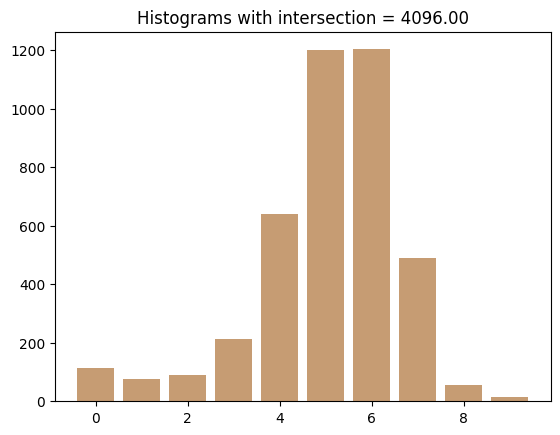

In [157]:
# Define histogram intersection function
def histogram_intersection(hist1, hist2):
    return np.sum(np.minimum(hist1, hist2))


# Compute histograms for class 1 and class 2
hist1, _ = np.histogram(X_class1, bins=10)
hist2, _ = np.histogram(X_class2, bins=10)

# Compute histogram intersection
intersection = histogram_intersection(hist1, hist2)

# Plot histograms
plt.bar(range(10), hist1, alpha=0.5)
plt.bar(range(10), hist2, alpha=0.5)
plt.title("Histograms with intersection = {:.2f}".format(intersection))
plt.show()

In [158]:
def normalize_histograms(hist1, hist2, bins):
    # Define bin edges for both histograms
    bin_edges1 = np.linspace(np.min(hist1), np.max(hist1), bins + 1)
    bin_edges2 = np.linspace(np.min(hist2), np.max(hist2), bins + 1)

    # Compute histograms using the same bin edges
    hist1_norm, _ = np.histogram(hist1, bins=bin_edges1)
    hist2_norm, _ = np.histogram(hist2, bins=bin_edges2)

    return hist1_norm, hist2_norm

In [159]:
hist1, hist2 = normalize_histograms(hist1, hist2, bins=10)
intersection = histogram_intersection(hist1, hist2)

In [160]:
intersection

10

In [161]:
!pip install dictances

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for dictances: filename=dictances-1.5.6-py3-none-any.whl size=13545 sha256=4f783ed2d71cc77cbfdfbeac79b5f83d6db9f4765c00b6f572141447db71a6da
  Stored in directory: c:\users\hammad\appdata\local\pip\cache\wheels\ef\be\f6\b38df97361f86b097ad72924b0513811630dcfff1b93017fb9
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5658 sha256=58b1b64b8415af6e300ebd48f01671eab742af621fc4f709dc14c9d5ecf71528
  Stored in directory: c:\users\hammad\appdata\local\pip\cache\wheels\dd\a9\9e\ecdbff4d417800e18dadb768e217c358fea52aa80289201ab0
Successfully built dictances support_developer



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [162]:
from dictances import bhattacharyya

In [163]:
bhattacharyya(input_image,X[10])

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [ ]:
total = 0
big, small = sort(a, b)
big_get = big.__getitem__
for k, small_value in small.items():
    try:
        total += sqrt(big_get(k) * small_value)
    except KeyError:
        pass
    
total

In [164]:
!pip install statistical-distance


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [167]:
import distance
distance.bhattacharyya(input_image,X[12])

-7.729799

In [168]:
# bhattacharyya test
import numpy
import math

h = [input_image, X[10]] 

def mean( hist ):
    mean = 0.0
    for i in hist:
        mean += i
    mean/= len(hist)
    return mean

def bhatta ( hist1,  hist2):
    # calculate mean of hist1
    h1_ = mean(hist1)

    # calculate mean of hist2
    h2_ = mean(hist2)

    # calculate score
    score = 0
    for i in range(8):
        score += math.sqrt( hist1[i] * hist2[i] )
    # print h1_,h2_,score;
    score = math.sqrt( 1 - ( 1 / math.sqrt(h1_*h2_*8*8) ) * score )
    return score

# generate and output scores
scores = []
for i in range(len(h)):
    score = []
    for j in range(len(h)):
        score.append( bhatta(h[i],h[j]) )
    scores.append(score)

for i in scores:
    print (i)

TypeError: only size-1 arrays can be converted to Python scalars

[0.08021825 0.14828222 0.15739793 0.34761241 0.68063969 0.60224458
 0.        ]


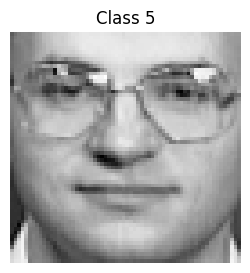

[1770, 1858, 1860, 1978, 1984, 2008, 2047, 2089, 2093, 2097, 2286, 2299, 2300, 2369, 2385, 2386, 2409, 2434, 2436, 2439, 2454, 2470, 2471, 2473, 2481, 2518, 2536, 2543, 2552, 2567, 2568, 2602, 2612, 2614, 2615, 2628, 2671, 2676, 2685, 2692, 2700, 2714, 2719, 2728, 2732, 2734, 2746, 2776, 2781, 2796, 2798, 2821, 2829, 2830, 2830, 2843, 2850, 2852, 2858, 2866, 2885, 2897, 2897, 2902, 2910, 2912, 2914, 2915, 2915, 2921, 2922, 2924, 2929, 2944, 2945, 2951, 2964, 2975, 2986, 2999, 2999, 3001, 3009, 3014, 3026, 3029, 3031, 3044, 3050, 3054, 3059, 3060, 3064, 3071, 3074, 3075, 3076, 3083, 3086, 3090, 3099, 3105, 3107, 3113, 3121, 3125, 3127, 3127, 3129, 3129, 3140, 3145, 3146, 3164, 3167, 3168, 3169, 3170, 3170, 3171, 3173, 3174, 3176, 3179, 3181, 3185, 3185, 3188, 3188, 3191, 3191, 3192, 3194, 3198, 3200, 3201, 3210, 3216, 3221, 3229, 3229, 3232, 3232, 3235, 3235, 3244, 3245, 3247, 3260, 3267, 3270, 3270, 3272, 3273, 3274, 3278, 3279, 3280, 3284, 3292, 3292, 3296, 3298, 3300, 3301, 3302, 330

In [200]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
import warnings
warnings.filterwarnings("ignore")

def histo_lbp(image_name, parameters_of_lbp, n_bins_of_histogram):

    # Convert image to grayscale if it's in color
    if len(image_name.shape) > 2:
        gray_image = cv2.cvtColor(image_name, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image_name

    # Convert image to integer dtype
    # gray_image = gray_image.astype(np.uint8)
    
    # Extract LBP texture features
    lbp_image = local_binary_pattern(gray_image, **parameters_of_lbp)
    
    # Compute histogram of LBP features
    h, _ = np.histogram(lbp_image.ravel(), bins=n_bins_of_histogram, range=(0, n_bins_of_histogram))
    
    # Normalize histogram
    h = normalize(h.reshape(1, -1))
    
    return h


def feature_extraction(X, n_bins_of_histogram, parameters_of_lbp):
    global y
    num_images = len(X)
    
    # Initialize matrix H to store LBP histograms and class labels
    H = np.zeros((num_images, n_bins_histograms + 1))  # +1 for class labels
    
    # Compute LBP histograms for each face image
    for i, image_name in enumerate(X):
        # Compute histogram of LBP features for each image
        h = histo_lbp(image_name, parameters_of_lbp, n_bins_of_histogram)
        
        # Store LBP histogram in H
        H[i, :-1] = h  # Store histogram values
        
        # Assign class label
        H[i, -1] = y[i]
    
    return H


def histo_distance(P, Q):
    hist1, _ = np.histogram(P, bins=6)
    hist2, _ = np.histogram(Q, bins=6)
    sim = np.sum(np.minimum(hist1, hist2))

    # plt.bar(range(6), hist1, alpha=0.5)
    # plt.bar(range(6), hist2, alpha=0.5)
    # plt.title("Histograms with intersection = {:.2f}".format(sim))
    # plt.show()

    return sim


def image_retrieval(query_image, X):
    # Local Binary Pattern (LBP) parameters
    params_lbp = {'P': 8, 'R': 1, 'method': 'uniform'}
    n_bins_histograms = 6

  
    
    return distances

# def histogram_intersection(hist1, hist2):
#     return np.sum(np.minimum(hist1, hist2))

# # Compute histograms for class 1 and class 2
# hist1, _ = np.histogram(input_image, bins=10)
# hist2, _ = np.histogram(X[11], bins=10)

# # Compute histogram intersection
# intersection = histogram_intersection(hist1, hist2)

# # Plot histograms
# plt.bar(range(10), hist1, alpha=0.5)
# plt.bar(range(10), hist2, alpha=0.5)
# plt.title("Histograms with intersection = {:.2f}".format(intersection))
# plt.show()






def main():
    # Load dataset
    data = fetch_olivetti_faces()
    X = data.images
    y = data.target
    
    # Randomly Select an Image to use as query
    idx = np.random.randint(0, len(X))
    query_image = X[idx]
    query_label = y[idx]

    
    plt.figure(figsize=(3, 3)) 
    plt.imshow(query_image, cmap='gray')
    plt.title(f"Class {query_label}")
    plt.axis('off')
    plt.show()

    # query_image_H = feature_extraction(query_image, n_bins_histograms, params_lbp)

    H = feature_extraction(X, n_bins_histograms, params_lbp)

    # distances = []
    # distances.append(histo_distance(query_image, X[i]))
    
    distances = image_retrieval(query_image, X)
    print(sorted(distances))


if __name__ == "__main__":
    main()


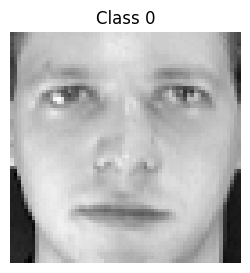

ValueError: The parameter `image` must be a 2-dimensional array

In [208]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from sklearn.datasets import fetch_olivetti_faces
import warnings

warnings.filterwarnings("ignore")

def histo_lbp(image_name, parameters_of_lbp, n_bins_of_histogram):
    # Convert image to grayscale if it's in color
    if len(image_name.shape) > 2:
        gray_image = cv2.cvtColor(image_name, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image_name

    # Extract LBP texture features
    lbp_image = feature.local_binary_pattern(gray_image, **parameters_of_lbp)
    
    # Compute histogram of LBP features
    h, _ = np.histogram(lbp_image.ravel(), bins=n_bins_of_histogram, range=(0, n_bins_of_histogram))
    
    # Normalize histogram
    h = h / np.sum(h)
    
    return h

def feature_extraction(X, n_bins_of_histogram, parameters_of_lbp):
    num_images = len(X)
    
    # Initialize matrix H to store LBP histograms and class labels
    H = np.zeros((num_images, n_bins_of_histogram))  # No need to add 1 for class labels
    
    # Compute LBP histograms for each face image
    for i, image_name in enumerate(X):
        # Compute histogram of LBP features for each image
        h = histo_lbp(image_name, parameters_of_lbp, n_bins_of_histogram)
        
        # Store LBP histogram in H
        H[i, :] = h  # Store histogram values
    
    return H

def histo_distance(P, Q):
    hist1, _ = np.histogram(P, bins=6)
    hist2, _ = np.histogram(Q, bins=6)
    sim = np.sum(np.minimum(hist1, hist2))
    return sim

def image_retrieval(query_image, X, params_lbp, n_bins_histograms):
    distances = []
    query_histogram = histo_lbp(query_image, params_lbp, n_bins_histograms)
    for img in X:
        target_histogram = histo_lbp(img, params_lbp, n_bins_histograms)
        distance = histo_distance(query_histogram, target_histogram)
        distances.append(distance)
    sorted_indices = np.argsort(distances)[::-1]  # Sort indices in descending order of similarity
    top_indices = sorted_indices[:5]  # Select top 5 indices
    top_images = [X[i] for i in top_indices]  # Get top 5 images
    return top_images

def compute_performance(query_label, top_images_labels):
    correct_retrievals = np.sum(top_images_labels == query_label)
    performance = correct_retrievals / 5  # 5 is the number of retrieved images
    return performance

def main():
    # Load dataset
    data = fetch_olivetti_faces()
    X = data.images
    y = data.target
    
    # Randomly Select an Image to use as query
    idx = np.random.randint(0, len(X))
    query_image = X[idx]
    query_label = y[idx]
    
    plt.figure(figsize=(3, 3)) 
    plt.imshow(query_image, cmap='gray')
    plt.title(f"Class {query_label}")
    plt.axis('off')
    plt.show()

    # Define LBP parameters
    params_lbp = {'P': 8, 'R': 1, 'method': 'uniform'}
    n_bins_histograms = 6

    # Compute LBP features for all images
    H = feature_extraction(X, n_bins_histograms, params_lbp)

    # Compute top 5 similar images
    # top_images = image_retrieval(query_image, X, params_lbp, n_bins_histograms)
    top_images = image_retrieval(query_image, X, params_lbp, n_bins_histograms)
    top_labels = [y[index] for index in top_indices]

    # # Display top 5 similar images
    # for i, image in enumerate(top_images, 1):
    #     plt.figure(figsize=(3, 3)) 
    #     plt.imshow(image, cmap='gray')
    #     plt.title(f"Similar Image {i}")
    #     plt.axis('off')
    #     plt.show()

    # Display top 5 similar images
    plt.figure(figsize=(15, 3))
    for i, (image, label) in enumerate(zip(top_images, top_labels), 1):
        plt.subplot(1, 5, i)
        plt.imshow(image, cmap='gray')
        plt.title(f"Class {label}")
        plt.axis('off')
    plt.show()

    # Compute performance
    top_indices = [np.where(np.all(X == img, axis=(1, 2)))[0][0] for img in top_images]
    top_images_labels = data.target[top_indices]
    performance = compute_performance(query_label, top_images_labels)
    print("Performance:", performance)


if __name__ == "__main__":
    main()


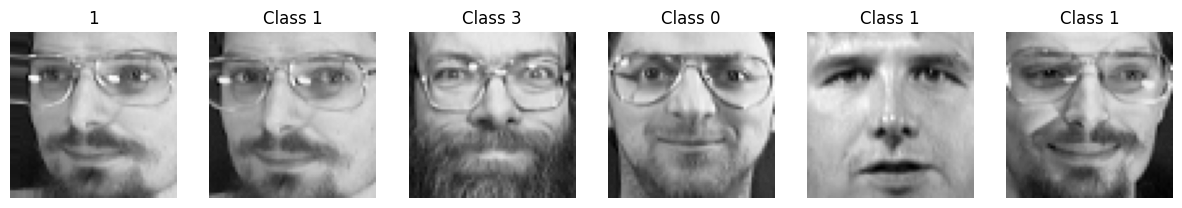

Performance: 0.4


In [211]:
def main():
    # Load dataset
    data = fetch_olivetti_faces()
    X = data.images
    y = data.target
    class_names = y  # Get class names
    
    # Randomly Select an Image to use as query
    idx = np.random.randint(0, len(X))
    query_image = X[idx]
    query_label = y[idx]
    query_class_name = class_names[query_label]  # Get query image class name
    
    plt.figure(figsize=(15, 3))  # Adjust figsize to fit all images in a row
    plt.subplot(1, 6, 1)  # Subplot for the query image
    plt.imshow(query_image, cmap='gray')
    plt.title(f"{query_class_name}")  # Set title as query image class name
    plt.axis('off')
    
    # Define LBP parameters
    params_lbp = {'P': 8, 'R': 1, 'method': 'uniform'}
    n_bins_histograms = 6

    # Compute LBP features for all images
    H = feature_extraction(X, n_bins_histograms, params_lbp)

    # Compute top 5 similar images
    top_images = image_retrieval(query_image, X, params_lbp, n_bins_histograms)

    # Display top 5 similar images
    for i, image in enumerate(top_images, 1):
        class_index = np.where((X == image).all(axis=(1, 2)))[0][0]
        class_label = y[class_index]
        class_name = class_names[class_label]  # Get class name of the similar image
        plt.subplot(1, 6, i + 1)  # Subplot for each similar image
        plt.imshow(image, cmap='gray')
        plt.title(f"Class {class_name}")  # Set title as similar image class name
        plt.axis('off')
    
    plt.show()

    # Compute performance
    top_indices = [np.where((X == img).all(axis=(1, 2)))[0][0] for img in top_images]
    top_images_labels = data.target[top_indices]
    performance = compute_performance(query_label, top_images_labels)
    print("Performance:", performance)

if __name__ == "__main__":
    main()


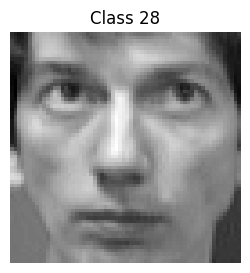

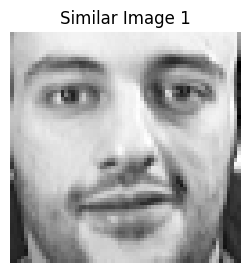

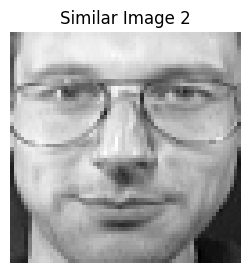

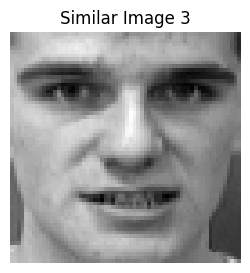

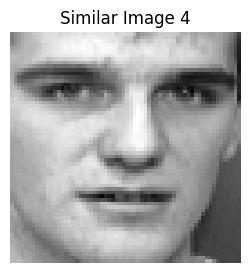

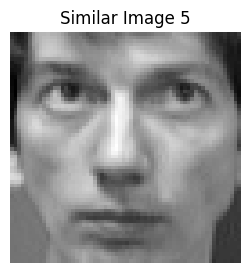

Performance: 0.2


In [204]:
def main():
    # Load dataset
    data = fetch_olivetti_faces()
    X = data.images
    y = data.target
    
    # Randomly Select an Image to use as query
    idx = np.random.randint(0, len(X))
    query_image = X[idx]
    query_label = y[idx]
    
    plt.figure(figsize=(3, 3)) 
    plt.imshow(query_image, cmap='gray')
    plt.title(f"Class {query_label}")
    plt.axis('off')
    plt.show()

    # Define LBP parameters
    params_lbp = {'P': 8, 'R': 1, 'method': 'uniform'}
    n_bins_histograms = 6

    # Compute LBP features for all images
    H = feature_extraction(X, n_bins_histograms, params_lbp)

    # Compute top 5 similar images
    top_images = image_retrieval(query_image, X, params_lbp, n_bins_histograms)

    # Display top 5 similar images
    for i, image in enumerate(top_images, 1):
        plt.figure(figsize=(3, 3)) 
        plt.imshow(image, cmap='gray')
        plt.title(f"Similar Image {i}")
        plt.axis('off')
        plt.show()

    # Compute performance
    top_indices = [np.where(np.all(X == img, axis=(1, 2)))[0][0] for img in top_images]
    top_images_labels = data.target[top_indices]
    performance = compute_performance(query_label, top_images_labels)
    print("Performance:", performance)

if __name__ == "__main__":
    main()


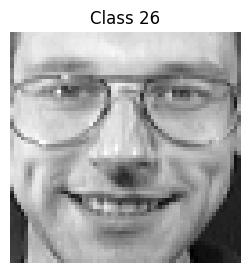

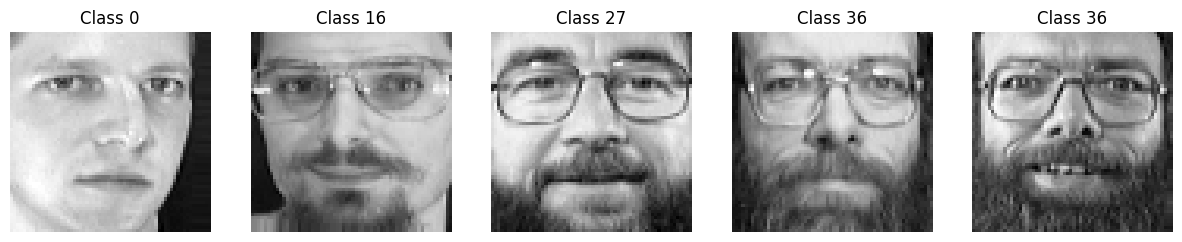

Performance: 0.0


In [206]:
def main():
    # Load dataset
    data = fetch_olivetti_faces()
    X = data.images
    y = data.target
    
    # Randomly Select an Image to use as query
    idx = np.random.randint(0, len(X))
    query_image = X[idx]
    query_label = y[idx]
    
    plt.figure(figsize=(3, 3)) 
    plt.imshow(query_image, cmap='gray')
    plt.title(f"Class {query_label}")
    plt.axis('off')
    plt.show()

    # Define LBP parameters
    params_lbp = {'P': 8, 'R': 1, 'method': 'uniform'}
    n_bins_histograms = 6

    # Compute LBP features for all images and store them in H
    H = feature_extraction(X, n_bins_histograms, params_lbp)

    # Compute distances between query image and dataset images
    # distances = []
    # for i in range(len(X)):
    #     if i != idx:  # Exclude the query image
    #         distance = histo_distance(H[idx], H[i])
    #         distances.append((distance, i))  # Store distance and index
    
    # # Sort distances in ascending order
    # distances.sort()

    # # Retrieve top 5 most similar images
    # top_indices = [index for (_, index) in distances[:5]]
    # top_images = [X[index] for index in top_indices]

    # # Display top 5 similar images
    # for i, image in enumerate(top_images, 1):
    #     plt.figure(figsize=(3, 3)) 
    #     plt.imshow(image, cmap='gray')
    #     plt.title(f"Similar Image {i}")
    #     plt.axis('off')
    #     plt.show()

    # # Compute performance
    # top_images_labels = data.target[top_indices]
    # performance = compute_performance(query_label, top_images_labels)
    # print("Performance:", performance)


    # Compute distances between query image and dataset images
    distances = []
    for i in range(len(X)):
        if i != idx:  # Exclude the query image
            distance = histo_distance(H[idx], H[i])
            distances.append((distance, i))  # Store distance and index
    
    # Sort distances in ascending order
    distances.sort()

    # Retrieve top 5 most similar images
    top_indices = [index for (_, index) in distances[:5]]
    top_images = [X[index] for index in top_indices]
    top_labels = [y[index] for index in top_indices]

    # Display top 5 similar images
    plt.figure(figsize=(15, 3))
    for i, (image, label) in enumerate(zip(top_images, top_labels), 1):
        plt.subplot(1, 5, i)
        plt.imshow(image, cmap='gray')
        plt.title(f"Class {label}")
        plt.axis('off')
    plt.show()

    # Compute performance
    performance = compute_performance(query_label, top_labels)
    print("Performance:", performance)

if __name__ == "__main__":
    main()


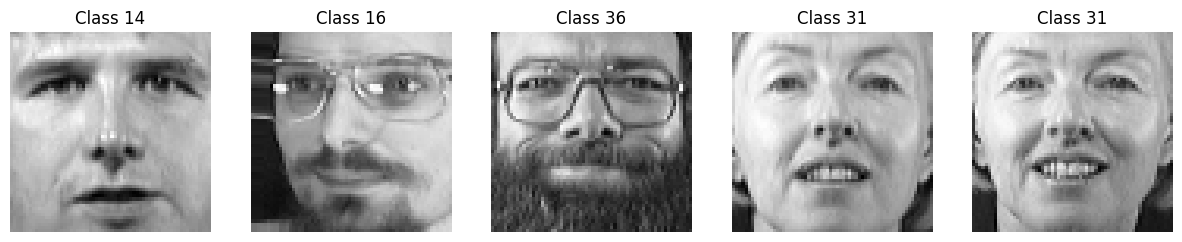

Performance: 0.0 %


In [207]:
def image_retrieval(query_image, dataset_X, dataset_H):
    # Compute LBP features for the query image
    query_hist = histo_lbp(query_image, params_lbp, n_bins_histograms)
    
    # Compute distances between query image and dataset images
    distances = []
    for hist in dataset_H:
        distance = histo_distance(query_hist, hist)
        distances.append(distance)
    
    # Sort distances in ascending order
    sorted_indices = np.argsort(distances)
    
    # Display the most similar images to the query image
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(sorted_indices[:5], 1):
        plt.subplot(1, 5, i)
        plt.imshow(dataset_X[idx], cmap='gray')
        plt.title(f"Class {y[idx]}")
        plt.axis('off')
    plt.show()
    
    return distances


def main():
    # Load dataset
    data = fetch_olivetti_faces()
    X = data.images
    y = data.target
    
    # Extract LBP features and compute histograms for the dataset
    params_lbp = {'P': 8, 'R': 1, 'method': 'uniform'}
    n_bins_histograms = 6
    H = feature_extraction(X, n_bins_histograms, params_lbp)

    # Randomly select a query image
    query_idx = np.random.randint(0, len(X))
    query_image = X[query_idx]
    query_label = y[query_idx]
    
    # Perform image retrieval
    distances = image_retrieval(query_image, X, H)

    # Compute performance
    top_indices = np.argsort(distances)[:5]
    top_images_labels = y[top_indices]
    correct_retrievals = np.sum(top_images_labels == query_label)
    performance = correct_retrievals / 5

    print("Performance:", performance * 100, "%")

if __name__ == "__main__":
    main()
